Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
#NLP for text preprocessing
import string 
import nltk
import re

load the dataset


In [3]:
df=pd.read_csv('tweet_data.csv')

In [4]:
df.shape

(31962, 3)

In [5]:
df.head()#label 1 means tweet is racist/sexist and 0 means tweet is not racist/sexist

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
#data type info
df.info() # here it is confirmed that there is no null value if there is some then we have to drop those

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


preprocess  the dataset

In [7]:
#remove some unique word from tweet
def remove_special_word(input_text,special_word):
  r=re.findall(special_word,input_text)
  for word in r:
    input_text=re.sub(word,"",input_text)
  return input_text
#it will return the same tweet by removing the special words like username and any pattern

In [8]:
#remove @username
df['clean_tweet']=np.vectorize(remove_special_word)(df['tweet'],"@[\w]*")


In [9]:
df.head()#removeed the tweeter handle names

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
#remove punctuation,numbers and special characters
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [11]:
#remove shorter words
df['clean_tweet']=df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))

In [12]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
#tokenization -converting sentence into words called tokens
tokenize_tweet=df['clean_tweet'].apply(lambda x: x.split())# here x will take every value of df['claen_tweet] and apply x.split()
tokenize_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [14]:
#stemming=diffrent form of word converted into one form of verb to reduce the no of words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
tokenize_tweet=tokenize_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenize_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [15]:
# combine tokens into a single sentence
for i in range(len(tokenize_tweet)):
  tokenize_tweet[i]=" ".join(tokenize_tweet[i])
df['clean_tweet']=tokenize_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


Data analysis

In [16]:
pip install wordcloud

In [17]:
#visualization
all_words=" ".join([sentence for sentence in df['clean_tweet']])#it will join all the tweets into a string

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_words)

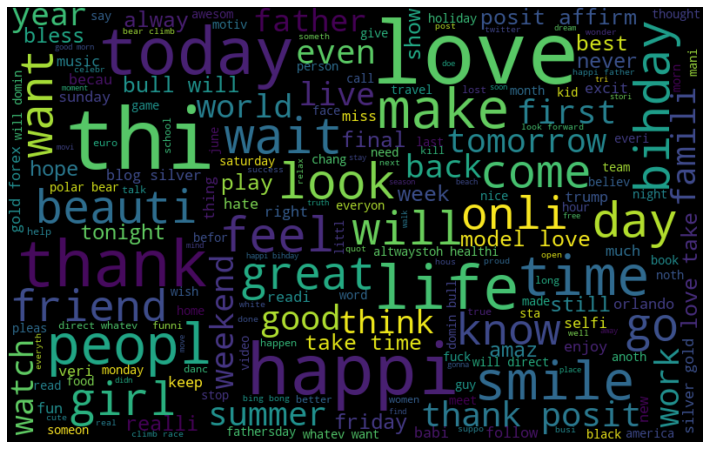

In [18]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()#bigger the word more frequent it is

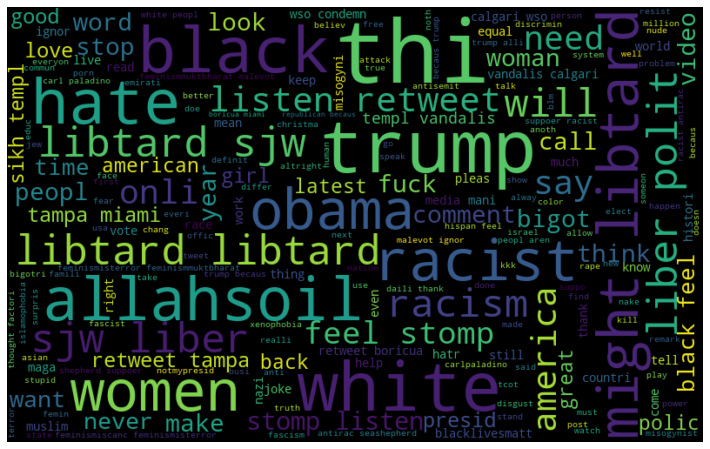

In [19]:
#frequent words visualization for positive(label==1)
#visualization
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])#here one extra condition inserted to filter the tweets having label as 0

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500, random_state=42,max_font_size=100).generate(all_words)
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()#bigger the word more frequent it is

In [20]:
#extract the hashtag
def extract_hashtag(tweet):
  hashtags=[]
  for word in tweet:
    ht=re.findall(r"#(\w+)",word)
    hashtags.append(ht)
  return hashtags

In [21]:
# hashtag extraction from label==0
ht_positive=extract_hashtag(df['clean_tweet'][df['label']==0])

#hashtag extraction from label==1
ht_negative=extract_hashtag(df['clean_tweet'][df['label']==1])  

In [22]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [23]:
#insert all negative hashtags into a single list
ht_negative=sum(ht_negative,[])

In [24]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [25]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [26]:
#insert all positive hashtags into a single list
ht_positive=sum(ht_positive,[])

In [27]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [28]:
#frequency Dataframe for the hashtags of negative tweets
frq=nltk.FreqDist(ht_positive)
hdp=pd.DataFrame({'Hashtags':list(frq.keys()),
                      'Count':list(frq.values())})
hdp.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [29]:
#frequency Dataframe for the hashtags of negative tweets
frq=nltk.FreqDist(ht_negative)
hdp=pd.DataFrame({'Hashtags':list(frq.keys()),
                      'Count':list(frq.values())})
hdp.head()

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


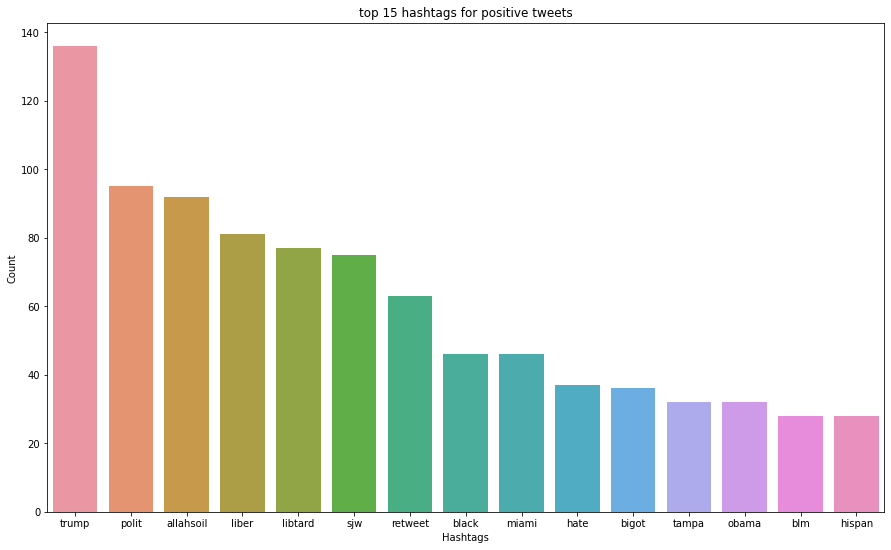

In [30]:
#top 15 hashtags for positive tweets
hdp=hdp.nlargest(columns='Count',n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=hdp,x='Hashtags',y='Count')
plt.title("top 15 hashtags for positive tweets")
plt.show()

In [31]:
#frequency Dataframe for the hashtags of negative tweets
frq=nltk.FreqDist(ht_positive)
hdp=pd.DataFrame({'Hashtags':list(frq.keys()),
                      'Count':list(frq.values())})
hdp.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


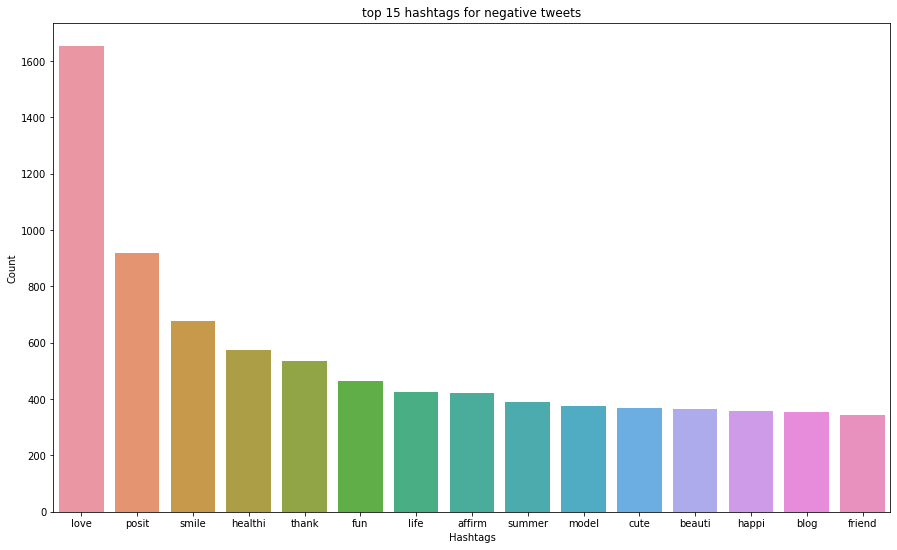

In [32]:
#top 15 hashtags for positive tweets
hdp=hdp.nlargest(columns='Count',n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=hdp,x='Hashtags',y='Count')
plt.title("top 15 hashtags for negative tweets")
plt.show()

Input split


In [33]:
#feature Extraction---bag of worgs
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])


In [34]:
np.shape(bow)

(31962, 1000)

In [35]:
#feature extraction using TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(df['clean_tweet'])

In [36]:
np.shape(tfidf)

(31962, 1000)

In [37]:
bow[0].toarray()# here is some value as 1 that means the that location crossponds to a particular word present at ith index

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
tfidf[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.20)

## model training

Bag of words

In [40]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [41]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
LR_pred=model.predict(x_test)

In [43]:
cm=confusion_matrix(y_test,LR_pred)
print(cm)
print("accuracy socre is:",accuracy_score(y_test,LR_pred))


[[5877   60]
 [ 287  169]]
accuracy socre is: 0.9457218833098702


In [44]:
#function to find out accuracy
actual=[]
for i in y_test:
  actual.append(i)
count=0
for i in range(len(LR_pred)):
  if(LR_pred[i]==actual[i]):
    count=count+1
print("the accuracy is",count/len(LR_pred)*100)

the accuracy is 94.57218833098702


In [45]:
f1_score(y_test,LR_pred)

0.49343065693430654

In [46]:
cr=classification_report(y_test,LR_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5937
           1       0.74      0.37      0.49       456

    accuracy                           0.95      6393
   macro avg       0.85      0.68      0.73      6393
weighted avg       0.94      0.95      0.94      6393



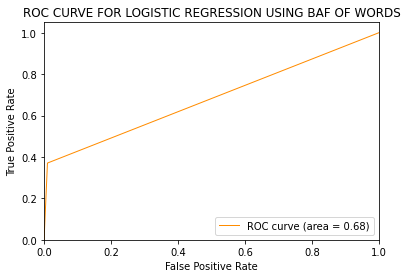

In [47]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, LR_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR LOGISTIC REGRESSION USING BAF OF WORDS')
plt.legend(loc="lower right")
plt.show()

TF-IDF

In [48]:
train_tfidf = tfidf[:31962,:]

In [49]:
# splitting data into training and test set
xtrain_tfidf, xtest_tfidf, ytrain, ytest = train_test_split(train_tfidf, df['label'], random_state=42, test_size=0.3)

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain_tfidf, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction = model.predict_proba(xtest_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)



In [54]:
f1_score(ytest, prediction_int)

0.5328596802841918

In [55]:
cm=confusion_matrix(ytest, prediction_int)
print(cm)
print("accuracy socre is:",accuracy_score(ytest, prediction_int))

[[8763  142]
 [ 384  300]]
accuracy socre is: 0.9451454791949109


In [56]:
#function to find out accuracy
actual=[]
for i in ytest:
  actual.append(i)
count=0
for i in range(len(prediction_int)):
  if(prediction_int[i]==actual[i]):
    count=count+1
print("the accuracy is",count/len(prediction_int)*100)

the accuracy is 94.5145479194911


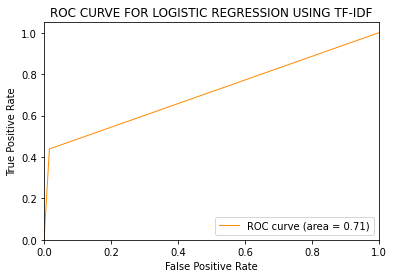

In [57]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ytest, prediction_int)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR LOGISTIC REGRESSION USING TF-IDF')
plt.legend(loc="lower right")
plt.show()

GRADIENT BOOSTING CLASSIFIER

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [63]:
GB_pred=clf.predict(x_test)

In [64]:
f1_score(y_test,GB_pred)

0.28428093645484953

In [65]:
#function to find out accuracy
actual=[]
for i in y_test:
  actual.append(i)
count=0
for i in range(len(GB_pred)):
  if(GB_pred[i]==actual[i]):
    count=count+1
print("the accuracy is",count/len(GB_pred)*100)

the accuracy is 93.30517753793211


In [66]:
accuracy_score(y_test,GB_pred)

0.9330517753793212

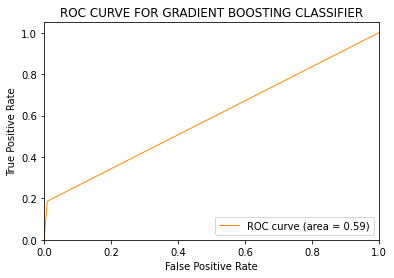

In [67]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, GB_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR GRADIENT BOOSTING CLASSIFIER')
plt.legend(loc="lower right")
plt.show()

NAIVE BAYES CLASSIFIER

In [68]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)

NB_pred = BNBmodel.predict(x_test)

In [69]:
print(NB_pred)

[0 0 1 ... 0 0 0]


In [70]:
#function to find out accuracy
actual=[]
for i in y_test:
  actual.append(i)
count=0
for i in range(len(NB_pred)):
  if(NB_pred[i]==actual[i]):
    count=count+1
print("the accuracy is",count/len(NB_pred)*100)

the accuracy is 93.83700922884405


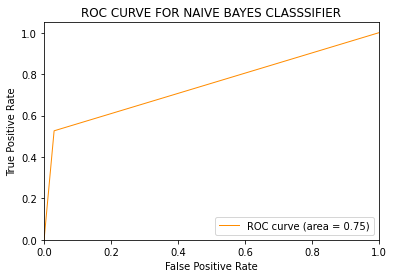

In [71]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, NB_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR NAIVE BAYES CLASSSIFIER')
plt.legend(loc="lower right")
plt.show()

SUPPORT VECTOR CLASSIFIER

In [77]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',C=30,gamma='auto')
clf.fit(x_train,y_train)


SVC(C=30, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
svc_pred=clf.predict(x_test)

In [79]:
print(svc_pred)

[0 0 0 ... 0 0 0]


In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.20)

In [81]:
from sklearn.model_selection import cross_val_score

In [92]:
import numpy as np
kernels=['rbf','linear']
C=[1,10,20]
avg_scores={}
for kval in kernels:
  for cval in C:
    cv_score=cross_val_score(SVC(kernel=kval,C=cval,gamma='auto'),bow,df['label'],cv=5)
    avg_scores[kval+'_'+str(cval)]=np.average(cv_score)

avg_scores

{'linear_1': 0.9494085951722463,
 'linear_10': 0.9487202934530042,
 'linear_20': 0.9486264261188365,
 'rbf_1': 0.9298542073258709,
 'rbf_10': 0.9401476691398425,
 'rbf_20': 0.9449658643772414}

In [93]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)

clf.fit(bow,df['label'])
clf.cv_results_

{'mean_fit_time': array([ 8.74685621, 10.57178311,  9.12061353, 42.78176723,  9.06436338,
        89.13585992]),
 'mean_score_time': array([1.43319268, 0.80246887, 1.4140543 , 0.814816  , 1.37009692,
        0.79090509]),
 'mean_test_score': array([0.92985421, 0.9494086 , 0.94014767, 0.94872029, 0.94496586,
        0.94862643]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],
 'rank_test_score': array([6, 1, 5, 2, 4, 3], dtype=int32),
 'split0_test_score': array([0.92976693

In [94]:
import numpy as np

In [95]:
res=pd.DataFrame(clf.cv_results_)

In [104]:
max(res['mean_test_score'])

0.9494085951722463

In [96]:
print(res)

   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       8.746856      0.176533  ...        0.000071                6
1      10.571783      0.056813  ...        0.001472                1
2       9.120614      0.145376  ...        0.000338                5
3      42.781767      1.671369  ...        0.001759                2
4       9.064363      0.086371  ...        0.000739                4
5      89.135860      7.675610  ...        0.001706                3

[6 rows x 15 columns]


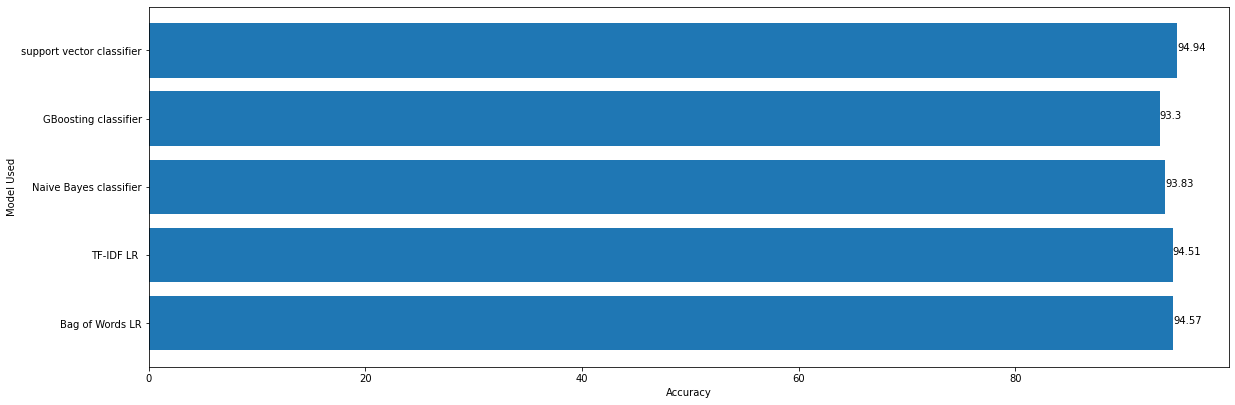

In [101]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
x = ['Bag of Words LR', 'TF-IDF LR ', 'Naive Bayes classifier', 'GBoosting classifier', 'support vector classifier']
y = [94.57,94.51,93.83,93.30,94.94]
ax.barh(x,y)
plt.ylabel('Model Used')
plt.xlabel('Accuracy')
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

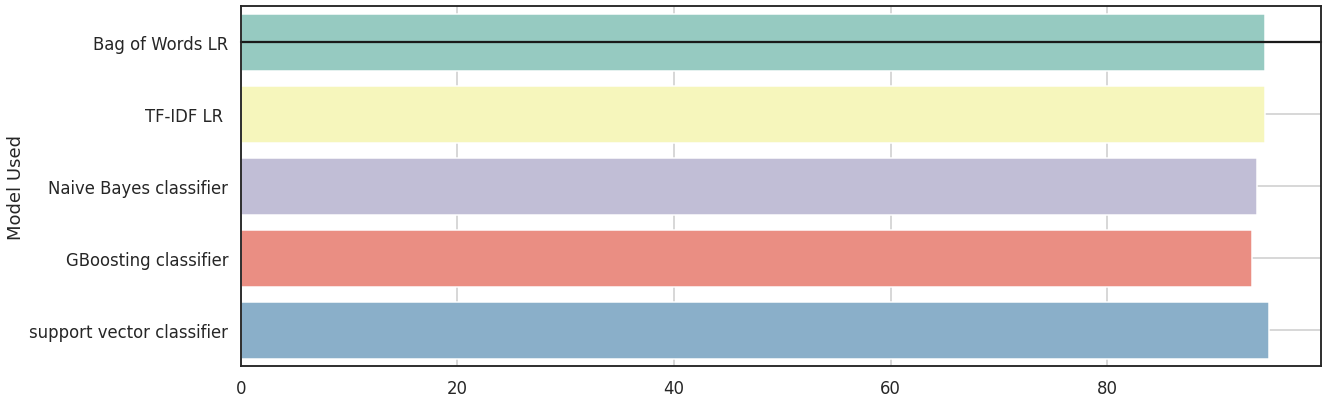

In [102]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0,0,1,1])

# Generate some sequential data

sns.barplot(x=y, y=x,  ax=ax1,  palette="Set3")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Accuracy")
ax1.set_ylabel("Model Used")
ax1.grid(True)

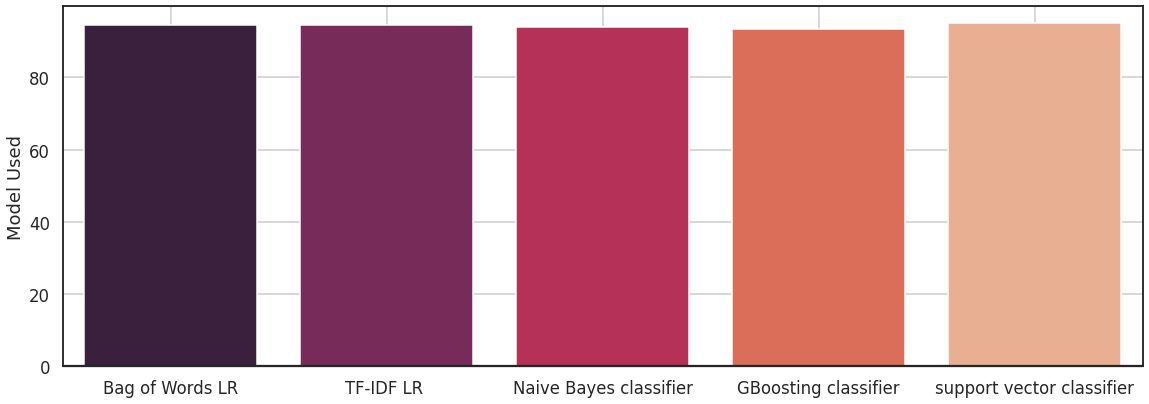

In [103]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_axes([0,0,1,1])

# Generate some sequential data

sns.barplot(x=x, y=y,  ax=ax1,  palette="rocket")
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Accuracy")
ax1.set_ylabel("Model Used")
ax1.grid(True)

## the best model is Support vector classifier with an accuracy of 94.94